In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

__requires__= 'numpy==1.22.3'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import graphviz 
import sklearn
from sklearn import tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print(train.head())
train.columns
set(list(train["MSSubClass"][:]))
type(list(train["PoolQC"][:])[0])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

float

In [3]:
def data_prep_dict(dataFrame):
    columns = dataFrame.columns
    getUniqVals = lambda column : set(list(column))
    dataFrameDict = {}
    for column in columns:
        columnUniqVals = getUniqVals(dataFrame.loc[:, column])
        auxDict = {}
        for (idx, val) in enumerate(columnUniqVals):
            if type(val) == str:
                auxDict[str(val)] = idx 
            try:
                if math.isnan(val):
                    auxDict[val] = idx
            except:
                pass
        dataFrameDict[column] = auxDict
    
    for column in columns:
        if dataFrameDict[column] == {}:
            dataFrameDict.pop(column)
        
        
    return dataFrameDict

print(data_prep_dict(train.head(15)))
trainDict = data_prep_dict(train.head(15))

def data_prep(dataFrame, dataFrameDict):
    dataFrameDictCollapsed = {}
    for key in list(dataFrameDict.keys()):
        dataFrameDictCollapsed.update(dataFrameDict[key])
    dataFrame = dataFrame.replace(dataFrameDictCollapsed)
    X = dataFrame.loc[:, "Id":"SaleCondition"]
    Y = dataFrame.loc[:, "SalePrice"]
    return X, Y

print(data_prep(train.head(15), trainDict))
XTrainHead, YTrainHead = data_prep(train.head(15), trainDict)

{'MSZoning': {'RL': 0, 'RM': 1}, 'LotFrontage': {nan: 3, nan: 10, nan: 13}, 'Street': {'Pave': 0}, 'Alley': {nan: 0}, 'LotShape': {'Reg': 0, 'IR2': 1, 'IR1': 2}, 'LandContour': {'Lvl': 0}, 'Utilities': {'AllPub': 0}, 'LotConfig': {'FR2': 0, 'Corner': 1, 'Inside': 2}, 'LandSlope': {'Gtl': 0}, 'Neighborhood': {'Sawyer': 0, 'Mitchel': 1, 'OldTown': 2, 'NWAmes': 3, 'NoRidge': 4, 'Somerst': 5, 'NAmes': 6, 'BrkSide': 7, 'Veenker': 8, 'CollgCr': 9, 'Crawfor': 10, 'NridgHt': 11}, 'Condition1': {'Norm': 0, 'Artery': 1, 'Feedr': 2, 'PosN': 3}, 'Condition2': {'Norm': 0, 'Artery': 1}, 'BldgType': {'2fmCon': 0, '1Fam': 1}, 'HouseStyle': {'1Story': 0, '1.5Fin': 1, '1.5Unf': 2, '2Story': 3}, 'RoofStyle': {'Gable': 0, 'Hip': 1}, 'RoofMatl': {'CompShg': 0}, 'Exterior1st': {'WdShing': 0, 'MetalSd': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'HdBoard': 4, 'BrkFace': 5}, 'Exterior2nd': {'Plywood': 0, 'MetalSd': 1, 'VinylSd': 2, 'HdBoard': 3, 'Wd Shng': 4}, 'MasVnrType': {'BrkFace': 0, 'Stone': 1, 'None': 2}, 'ExterQu

None


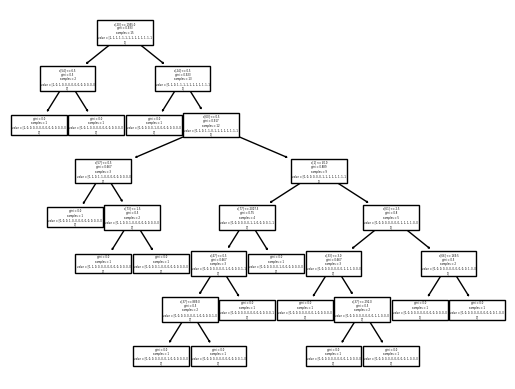

In [4]:
def tree_classifier(X, Y):
    classifier = tree.DecisionTreeClassifier()
    classifier.fit(X, Y)
    tree.plot_tree(classifier)
    
print(tree_classifier(XTrainHead, YTrainHead))